# Assignment 2 - Supervised Machine Learning Fundamentals

## Tigran Harutyunyan
Netid: th314

*Names of students you worked with on this assignment*: LIST HERE IF APPLICABLE (delete if not)

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

In [2]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'


# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. A large sample size with several predictors helps avoid the problem of overfitting more flexible statistical learning methods. Also, flexible statistical learning method has less bias, so flexible statistical learning method will perform better.
2. A large number of predictors for small observations means higher chances of overfitting for flexible statistical learning methods / higher variance, hence very poor performance. Although flexible statistical learning method has less bias, it will perform worse.
3. Implementing inflexible statistical learning methods in this case will introduce higher bias by impacting method performance. Hence more flexible statistical learning method will perform better.
4. Higher variance of the error term indicates higher bias, which can be reduced with flexible statistical learning methods.

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)**
  * (i) The problem is "regression" since the response variable is "salary" which is an interval of numbers. 
  * (ii) We are interested in inference because we are looking for a relationship between predictors and response.
  * (iii) Sample size --> 500, predictors --> 3

**(b)** 
  * (i) The problem is "classification" since the response variable is binary (success/failure). 
  * (ii) We are interested on the success of the product in the feuture, it is prediction. We have not included details of all predictors as we are more interested in prediction. Moreover, we included a large number of predictors in the model in order to build a reliable prediction model with higher accuracy.
  * (iii) Sample size --> 20, predictors --> 13

**(c)** 
  * (i) The problem is "regression" since the response variable is "% change" which is an interval of numbers. 
  * (ii) We are interested in predicting the % change.
  * (iii) Sample size --> 52, predictors --> 3

# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [2]:
import numpy as np

X = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]])
y = np.array(["r", "r", "r", "b", "b", "r"])
d = np.array([0, 0, 0])

# Distance
list = [round(np.linalg.norm(i - d), 2) for i in X]
print("List of Distance is: ", list)


List of Distance is:  [3.0, 2.0, 3.16, 2.24, 1.41, 1.73]


In [4]:
X[[1, 3, 4]]


array([[ 2,  0,  0],
       [ 0,  1,  2],
       [-1,  0,  1]])

**ANSWER**:

**(a)** 
Table 2. Euclidean distance between each observation and the test point (0,0,0)

| Obs. | **1** | **2** | **3** | **4** | **5** | **6** |
|------|-------|-------|-------|-------|-------|-------|
| Dist |   3   |   2   |  3.2  |  2.2  |  1.4  |  1.7  |

**(b)** 
Prediction $\hat{y}$, when $K=1$ for the test point (0,0,0) will be **blue** because our model has been trained to look for the nearest neighbor and classify the new point according to it, which in this case is observation 5 with a distance of 1.4 and **blue**.

**(c)** Prediction $\hat{y}$, when $K=3$ for the test point (0,0,0) will be **red** because our model has been trained to look for the nearest 3 neighbors and classify the new point according to the color of the majority of the points, which in this case are observations 5 - *blue*, 6 - **red**, 2 - **red**.

**(d)** In this case higher will cause higher bais and poor performance of classification, hence the *best* would be smoller value of $K$/more flexible.

## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

**ANSWER**:

**(a)**

In [3]:
# Skeleton code for part (a) to write your own kNN classifier


class Knn:
    # k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass

    def fit(self, X, y):
        # Save the training data to properties of this class
        self.X = X.to_numpy()
        self.y = y.to_numpy().ravel()

    def predict(self, x_pred, k):
        x_pred = x_pred.to_numpy()
        y_hat = []
        for x in x_pred:
            dist = np.array([np.linalg.norm(i - x) for i in self.X])
            nn_idx = dist.argsort()[:k]  # indexes of nearest neighbors
            nn_y = self.y[nn_idx]  # labels of nearest neighbors
            value, count = np.unique(nn_y, return_counts=True)
            y_hat.append(value[np.argmax(count)])  # label of majority
        # Return the estimated targets
        return y_hat


# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y, y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy


**(b)**

In [4]:
# Loading Data

import pandas as pd

X_test_high = pd.read_csv(
    "C:\\Users\\harut\\OneDrive\\Documents\\VS_CODE\\ids705\\assignments\\data\\A2_X_test_high.csv",
    header=None,
)
X_test_low = pd.read_csv(
    "C:\\Users\\harut\\OneDrive\\Documents\\VS_CODE\\ids705\\assignments\\data\\A2_X_test_low.csv",
    header=None,
)

X_train_high = pd.read_csv(
    "C:\\Users\\harut\\OneDrive\\Documents\\VS_CODE\\ids705\\assignments\\data\\A2_X_train_high.csv",
    header=None,
)
X_train_low = pd.read_csv(
    "C:\\Users\\harut\\OneDrive\\Documents\\VS_CODE\\ids705\\assignments\\data\\A2_X_train_low.csv",
    header=None,
)

y_test_high = pd.read_csv(
    "C:\\Users\\harut\\OneDrive\\Documents\\VS_CODE\\ids705\\assignments\\data\\A2_y_test_high.csv",
    header=None,
)
y_test_low = pd.read_csv(
    "C:\\Users\\harut\\OneDrive\\Documents\\VS_CODE\\ids705\\assignments\\data\\A2_y_test_low.csv",
    header=None,
)

y_train_high = pd.read_csv(
    "C:\\Users\\harut\\OneDrive\\Documents\\VS_CODE\\ids705\\assignments\\data\\A2_y_train_high.csv",
    header=None,
)
y_train_low = pd.read_csv(
    "C:\\Users\\harut\\OneDrive\\Documents\\VS_CODE\\ids705\\assignments\\data\\A2_y_train_low.csv",
    header=None,
)


**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

In [78]:
# Performance of model on low dimensional dataset
clf_low = Knn()
clf_low.fit(X_train_low, y_train_low)
y_hat_low = clf_low.predict(X_test_low, 5)
acc_low = accuracy(y_test_low[0], y_hat_low)

# Performance of model on high dimensional dataset
clf_high = Knn()
clf_high.fit(X_train_high, y_train_high)
y_hat_high = clf_high.predict(X_test_high, 5)
acc_high = accuracy(y_test_high[0], y_hat_high)

print("Accuracy for low dimensional dataset is:", acc_low)
print("Accuracy for high dimensional dataset is:", acc_high)


Accuracy for low dimensional dataset is: 0.925
Accuracy for high dimensional dataset is: 0.993


In [76]:
import timeit

# Time to make prediction: low dimensional dataset
start = timeit.default_timer()

clf_low.fit(X_train_low, y_train_low)
y_hat_low = clf_low.predict(X_test_low, 5)

stop = timeit.default_timer()

loop = round((stop - start), 5)

print("Time [sec] KNN_5_Low: ", loop)

# Time to make prediction: high dimensional dataset
start = timeit.default_timer()

clf_high.fit(X_train_high, y_train_high)
y_hat_high = clf_high.predict(X_test_high, 5)

stop = timeit.default_timer()

vec = round((stop - start), 5)

print("Time [sec] KNN_5_High: ", vec)


Time [sec] KNN_5_Low:  3.18106
Time [sec] KNN_5_High:  3.54564


**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

In [81]:
from sklearn import neighbors, datasets, metrics

# Performance of model on low dimensional dataset sklearn model
clf_s_low = neighbors.KNeighborsClassifier(n_neighbors=5)
clf_s_low.fit(X_train_low, y_train_low.to_numpy().ravel())
y_hat_low_s = clf_s_low.predict(X_test_low)
acc_low_sk = accuracy(y_test_low[0], y_hat_low_s)

# Performance of model on high dimensional dataset sklearn model
clf_s_high = neighbors.KNeighborsClassifier(n_neighbors=5)
clf_s_high.fit(X_train_high, y_train_high.to_numpy().ravel())
y_hat_high_s = clf_s_high.predict(X_test_high)
acc_high_sk = accuracy(y_test_high[0], y_hat_high_s)

print("Accuracy for low dimensional dataset is:", acc_low_sk)
print("Accuracy for high dimensional dataset is:", acc_high_sk)


Accuracy for low dimensional dataset is: 0.925
Accuracy for high dimensional dataset is: 0.993


In [82]:
# Time to make prediction with sklear model: low dimensional dataset
start = timeit.default_timer()

clf_s_low.fit(X_train_low, y_train_low.to_numpy().ravel())
y_hat_low_s = clf_s_low.predict(X_test_low)

stop = timeit.default_timer()

loop = round((stop - start), 5)

print("Time [sec] KNN_5_Low_sklearn: ", loop)

# Time to make prediction with sklear model: high dimensional dataset
start = timeit.default_timer()

clf_s_high.fit(X_train_high, y_train_high.to_numpy().ravel())
y_hat_high_s = clf_s_high.predict(X_test_high)

stop = timeit.default_timer()

vec = round((stop - start), 5)

print("Time [sec] KNN_5_High_sklearn: ", vec)


Time [sec] KNN_5_Low_sklearn:  0.01896
Time [sec] KNN_5_High_sklearn:  0.03986


Accuracy for both models is similar, however speed is of sklearn model is 100 times faster.

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?


The disadvantage of the slow prediction process is that it limits the implementation in a particular applications. For example, if a forecast is needed to make a decision to buy or sell a stock, slow forecasting is not the best choice.

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

**ANSWER**

**(a)**

In [118]:
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=0.35, random_state=1234)


**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

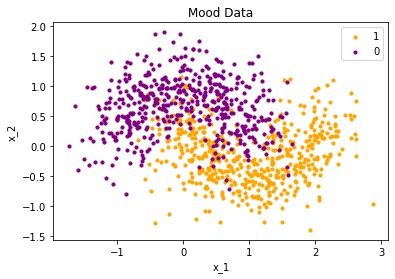

In [119]:
import matplotlib.pyplot as plt
# plot scatterplot of dataset
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], s=10, c="orange", label="1")
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], s=10, c="purple", label="0")
plt.title("Mood Data")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend()
plt.show()


**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

In [120]:
# Define names for all possible scenarios
names = [
    ["clf_Sample=1_K=1", "clf_Sample=1_K=25", "clf_Sample=1_K=50"],
    ["clf_Sample=2_K=1", "clf_Sample=2_K=25", "clf_Sample=2_K=50"],
    ["clf_Sample=3_K=1", "clf_Sample=3_K= 25", "clf_Sample=3_K=50"],
]

# Train models in the loop for random samples of 100 observations with replacement
lst = []
for i in range(3):
    set = np.random.choice(1000, 100, replace=True)
    for j, k in enumerate([1, 25, 50]):
        clf = neighbors.KNeighborsClassifier(n_neighbors=k)
        lst.append((names[i][j], clf.fit(X[set], y[set]), set))


**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

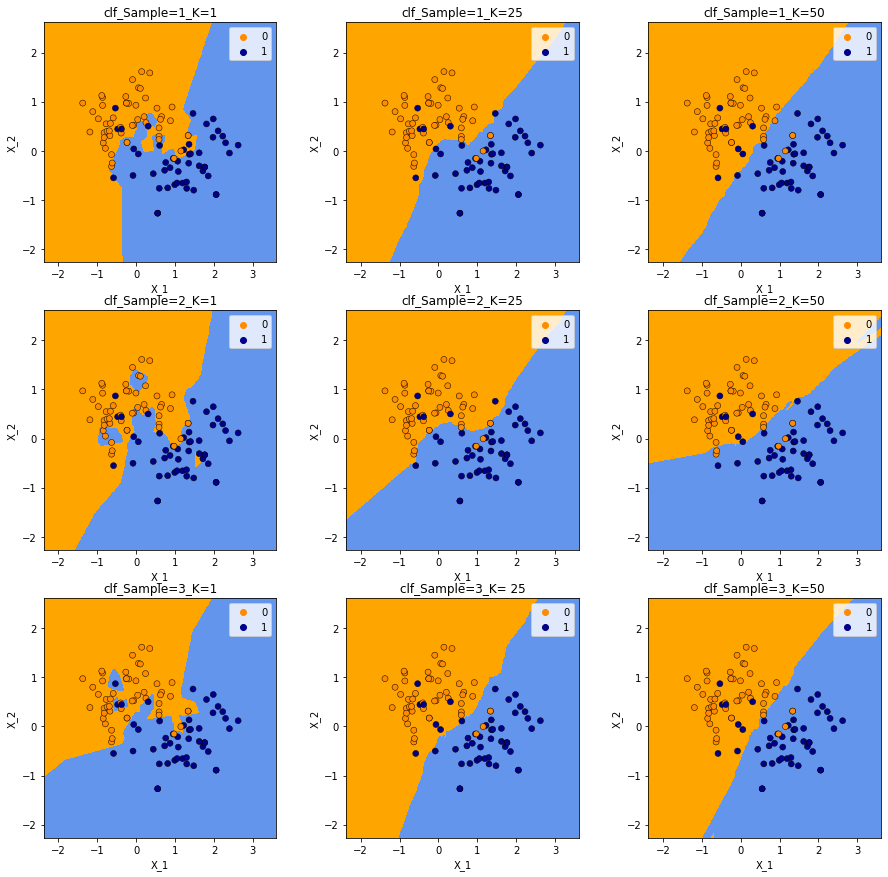

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, metrics

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]


fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=0.2, wspace=0.3)

i = 1
for pkg in lst:
    fig.add_subplot(3, 3, i)
    # we create an instance of Neighbours Classifier and fit the data.
    clf = pkg[1]
    X_t = X[set]
    y_t = y[set]

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_t[:, 0].min() - 1, X_t[:, 0].max() + 1
    y_min, y_max = X_t[:, 1].min() - 1, X_t[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # plt.figure(figsize=(4, 3))

    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X_t[:, 0],
        y=X_t[:, 1],
        hue=y_t,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(pkg[0])
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    i = i + 1

plt.show()


**(e)** K = 25 (column 2) shows the best decision bounderies for splitting the two classes, it is neither overfitting nor underfitting compared to K = 1 (column 1) and K = 50 (column 3). In the case of K=1, the decision bounds change the most as the data changes.

**(f)** The tradeoff of bias and variance refers to the situation where we need to properly infer what level of flexibility a statistical learning method will perform best. In this case a classification with higher accuracy of unseen observations. Overgeneralization implies less variance, but at the same time more bias towards the implementation of the wrong model (in this case it would then be K = 50). To improve the bias, we can increase the flexibility (K from 50 to 25), which will also slightly increase the variance, resulting in better performance. We can improve the bias even more by increasing the flexibility (K = 1), however, we will also increase the variance significantly, resulting in performance degradation.
When training supervised machine learning algorithms, one should always keep in mind that increasing accuracy by increasing flexibility comes at the risk of the model being subjected to higher variance.

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)**

In [83]:
# Loading Data
X_test, y_test = sklearn.datasets.make_moons(
    n_samples=1000, noise=0.35, random_state=1235
)
X_train, y_train = sklearn.datasets.make_moons(
    n_samples=1000, noise=0.35, random_state=1234
)


**(b**)

In [64]:
# Loop through different values of k:

from sklearn.metrics import accuracy_score

ACC = []
ACC_train = []
for k in range(1, 500):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train.ravel())
    y_hat = clf.predict(X_test)
    y_hat_train = clf.predict(X_train)
    acc_test = accuracy_score(y_test, y_hat)
    acc_train = accuracy_score(y_train, y_hat_train)
    ACC_train.append(1 - acc_train)  # list of test_erorrs for train dataset
    ACC.append(1 - acc_test)  # list of test_erorrs for test dataset


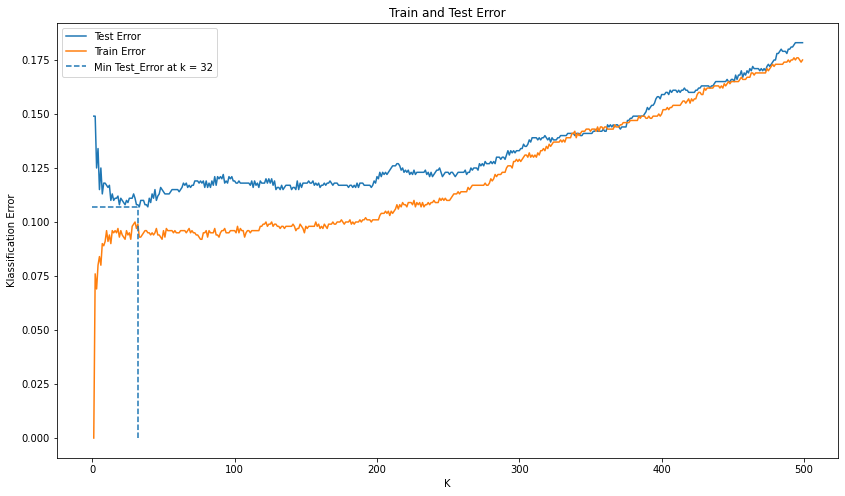

In [88]:
# List of k values from 1 to 500
K = [i for i in range(1, 500)]

# specifying the plot size
plt.figure(figsize=(14, 8))
plt.plot(K, ACC, label="Test Error")
plt.plot(K, ACC_train, label="Train Error")
plt.vlines(
    ACC.index(min(ACC)),
    0,
    min(ACC),
    linestyle="dashed",
    label="Min Test_Error at k = 32",
)  # minimum test-error
plt.hlines(min(ACC), 0, ACC.index(min(ACC)), linestyle="dashed")  # minimum test-error
plt.title("Train and Test Error")
plt.ylabel("Klassification Error")
plt.xlabel("K")
plt.legend()

plt.show()


**(c)** What trend do you see in the results?

The classification error drops sharply with increasing k from unity, then with increasing k up to 220 it fluctuates between 0.11 and 0.25, and after 220 it gradually increases.

**(d)** What values of $k$ represent high bias and which represent high variance?

Lower values of k represents high variance (highest k = 1) and higher k represent high bias (highest k = 500)

**(e)** What is the optimal value of $k$ and why?

The optimal value of k is 32, then the classification errore reaches the minimum --> 0.107.


In [70]:
# K value with lowes test error
print("K = ", ACC.index(min(ACC)))
print("Min test_error is: ", np.round(min(ACC), 3))


K =  32
Min test error is:  0.107



**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

In case of parametric models the namber of parametrs. In case of Neural Networks number of layers.

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

In [110]:
# Importing Data
import numpy as np
import pandas as pd

path = "./data/"
train = pd.read_csv(path + "A2_Q7_train.csv")
test = pd.read_csv(path + "A2_Q7_test.csv")

x_train = train.x.values
y_train = train.y.values

x_test = test.x.values
y_test = test.y.values


**ANSWER**

**(a)**

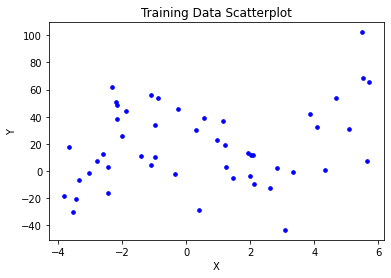

In [91]:
# Scatter plot of training data.
plt.scatter(x_train, y_train, s=13, c="blue")
plt.title("Training Data Scatterplot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train)  # Fitting the model
y_pred = reg.predict(x_train.reshape(-1, 1))  # Make the prediction on train dataset
R_2_1 = reg.score(x_train.reshape(-1, 1), y_train)
MSE_1 = mean_squared_error(y_train, y_pred)
print("Baseline model R_2: ", np.round(R_2_1, 3))
print("Baseline model Coef: ", np.round(reg.coef_, 3)[0])
print("Baseline model Intercept: ", np.round(reg.intercept_, 3))
print("Baseline model MSE: ", np.round(MSE_1, 3))


Baseline model R_2:  0.065
Baseline model Coef:  2.591
Baseline model Intercept:  17.205
Baseline model MSE:  791.417


$$ \hat{y} = 17.205 + 2.591*x$$

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

In [99]:
x_train_2D = x_train[:, None]  # change x-train shape
x_train_sin = np.sin(x_train_2D)  # creating new variable sin(x_train)
x_train_sqr = x_train_2D**2  # creating new variable x_train squared
x_train_cb = x_train_2D**3  # creating new variable x_train cube
l_1 = np.append(x_train_2D, x_train_sin, 1)  # add sin(x) as predictor variable
l_2 = np.append(l_1, x_train_sqr, 1)  # add x_train squared as predictor variable
x_train_m = np.append(l_2, x_train_cb, 1)  # add x_train cube as predictor variable

reg_1 = LinearRegression().fit(x_train_m, y_train)
y_pred_m = reg_1.predict(x_train_m)
R_2_M = reg_1.score(x_train_m, y_train)
MSE_M = mean_squared_error(y_train, y_pred_m)
print("Multiple Regression model R_2: ", np.round(R_2_M, 3))
print("Multiple Regression model Coef: ", np.round(reg_1.coef_, 3))
print("Multiple Regression model Intercept: ", np.round(reg_1.intercept_, 3))
print("Multiple Regression model MSE: ", np.round(MSE_M, 3))


Multiple Regression model R_2:  0.406
Multiple Regression model Coef:  [-7.203 -5.787 -1.923  0.76 ]
Multiple Regression model Intercept:  23.195
Multiple Regression model MSE:  502.821


*Multiple Regression Model*

$$ \hat{y} = 23.149 -7.203*x - 5.787*\sin{x} - 1.923*x^2 + 0.76*x^2$$

**(d)**

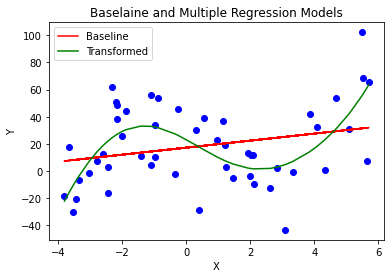

In [122]:
# plot train dataset
plt.scatter(x_train, y_train, color="b")

# plot baseline model
x = x_train.reshape(-1, 1)
y = reg.predict(x)
plt.plot(x, y, color="r", label="Baseline")

# plot Multiple Regression model
arr1inds = x_train.argsort()
sorted_arr1 = x_train[arr1inds[::-1]]
sorted_arr2 = y_pred_m[arr1inds[::-1]]
plt.plot(sorted_arr1, sorted_arr2, color="green", label="Transformed")

plt.title("Baselaine and Multiple Regression Models")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()


**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.


In [116]:
y_pred_n = reg.predict(x_test.reshape(-1, 1))
R_2_1_test = reg.score(x_test.reshape(-1, 1), y_test)
MSE_test = mean_squared_error(y_test, y_pred_n)
print("Baselaine Model R_2: ", np.round(R_2_1_test, 3))
print("Baselaine Model MSE: ", np.round(MSE_test, 3))

x_test_2D = x_test[:, None]  # change x-test shape
x_test_sin = np.sin(x_test_2D)  # creating new variable sin(x_test)
x_test_sqr = x_test_2D**2  # creating new variable x_test squared
x_test_cb = x_test_2D**3  # creating new variable x_test cube
l_1 = np.append(x_test_2D, x_test_sin, 1)  # add sin(x) as predictor variable
l_2 = np.append(l_1, x_test_sqr, 1)  # add x_test squared as predictor variable
x_test_m = np.append(l_2, x_test_cb, 1)  # add x_test cube as predictor variable

y_pred_nm = reg_1.predict(x_test_m)

R_2_M_test = reg_1.score(x_test_m, y_test)
MSE_M_test = mean_squared_error(y_test, y_pred_nm)
print("Multiple Regression Model R_2: ", np.round(R_2_M_test, 3))
print("Multiple Regression Model MSE: ", np.round(MSE_M_test, 3))


Baselaine Model R_2:  -0.133
Baselaine Model MSE:  1116.663
Multiple Regression Model R_2:  0.162
Multiple Regression Model MSE:  825.905



**(f)** Which models perform better on the training data, and which on the test data? Why?

Multiple regression(flexible) model performed better on both training and test data. This can be explained by the fact that the dataset has a poor but visible pattern that cannot be explained by a linear fit (large bias), hence the linear model had a higher test error. However, the flexible model was able to cupture/generalize the dataset pattern resulting in less test error.


**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

The model will not be able to make a reliable prediction because the level of flexibility of model is higher. It has been trained to capture a certain pattern, anything that doesn't match the pattern will result in a higher MSE and a low R^2.